# Regresión Logística: Predicción de Enfermedad Coronaria

A continuación se observa un problema de clasificación binaria y se desea analizar una posible solución a partir de un modelo de regresión logística. Se busca implementar el algoritmo mencionado, inicialmente empleando la librería SciKit-Learn para luego desarrollar el mismo proceso de entrenamiento manualmente (Descenso de Gradiente Estocástico).

También se introducirán algunos conceptos para lidiar con datos desbalanceados como: matriz de confusión, curva ROC, y algunas otras métricas importantes.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **20 de septiembre** y se realizará a través de Bloque Neón.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.preprocessing import binarize
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
heart_df=pd.read_csv("heartDisease/framingham.csv")
heart_df.dropna(axis=0,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
print(f'Se tienen {len(heart_df)} datos.')

Se tienen 3749 datos.


### Análisis de Distribución de Clases

En el diagrama a continuación puede observar un claro desbalanceo de los datos, en pasos posteriores hablaremos al respecto.

<AxesSubplot:ylabel='TenYearCHD'>

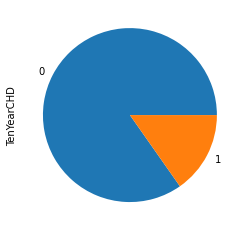

In [4]:
heart_df['TenYearCHD'].value_counts().plot(kind='pie')

## Descripción de Variables

Cada atributo es un factor potencial de riesgo. Existen factores demográficos, conductuales y médicos.

- Demográfico:

    - male: masculino (1) o femenino (0); (Nominal)

    - age: edad del paciente; (Continuo: aunque las edades registradas se han truncado a números enteros, el concepto de edad es continuo)

- Comportacional:

    - currentSmoker: si el paciente es o no fumador actual (nominal)

    - cigsPerDay: la cantidad de cigarrillos que la persona fumó en promedio en un día (se puede considerar continuo ya que uno puede tener cualquier cantidad de cigarrillos, incluso medio cigarrillo).

- Historia médica:

    - BPMeds: si el paciente estaba o no tomando medicación para la presión arterial (nominal)

    - prevalentStroke: si el paciente había tenido previamente un accidente cerebrovascular o no (nominal)

    - prevalentHyp: si el paciente era hipertenso (nominal)

    - diabetes: si el paciente tenía diabetes o no (nominal)

- Estado Médico actual:

    - totChol: nivel de colesterol total (continuo)

    - sysBP: presión arterial sistólica (continua)

    - diaBP: presión arterial diastólica (continua)

    - IMC: índice de masa corporal (continuo)

    - heartRate: frecuencia cardíaca (continua: en la investigación médica, variables como la frecuencia cardíaca, aunque de hecho son discretas, se consideran continuas debido a la gran cantidad de valores posibles).

    - glucose: nivel de glucosa (continuo)

- **Variable a Predecir**

    - TenYearCHD: Riesgo de padecer enfermedad coronaria 10 años en el futuro (binario: "1", significa "Sí", "0" significa "No")

In [7]:
x = heart_df.iloc[:,:-1]
y = heart_df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=22)

In [6]:
scaler = MinMaxScaler()# Utilice un MinMaxScaler #
x_train = scaler.fit_transform(x_train)# Ajuste y Aplique el Escalamiento (función fit_transform) #
x_test = scaler.transform(x_test)# Aplique el Escalamiento (función transform) #

Análisis:
Se pretende escalar los datos de entrenamiento y de prueba mediante las funciones correspondientes, que se encargan de asignar y retornar los valores de los vectores de diferente forma para evitar problemas de tipo "leaking"

## Parte 1

A continuación, debe utilizar la función `LogisticRegression` de SciKit-Learn para obtener un primer modelo de regresión logística y calcular su precisión a partir de la función `accuracy_score`.

Obtenga resultados sobre los datos de entrenamiento y los datos de prueba. Concluya al respecto.

In [52]:
logreg = LogisticRegression()# Modelo de Regresión Logística #
logreg.fit(x_train, y_train) # Entrenamiento sobre los Datos #
y_pred = logreg.predict(x_test) # Predicción de Etiquetas #

print(f'Precisión inicial: {accuracy_score(y_test, y_pred)  }') # INCLUYA AQUÍ EL CÁLCULO DE LA PRECISIÓN DEL MODELO

Precisión inicial: 0.844


Análisis:
Se procede a crear la instancia de regresión lineal y con ella entrenar el modelo a partir de los datos de entrenamiento para así obtener los pesos del modelo, que luego serán útiles a la hora de estimar los valores de salida de los datos de prueba. Una vez se estimen, se compararán con las salidas de prueba para calcular su precisión mediante la función "accuracy_score"

### Matriz de Confusión

Como recordará, la información en este dataset no posee una distribución de clases balanceada. La matriz de confusión es una herramienta que permite analizar el comportamiento del modelo para estos datos.

Puede encontrar más información en este artículo: [Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

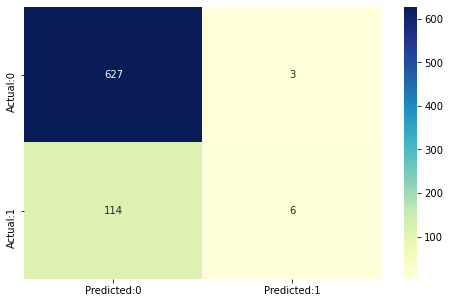

In [53]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

Comentario
En este caso se utiliza una matriz de confusión que indica qué valores son falsos o verdaderos positivos, y falsos o verdaderos negativos. La presición anteriormente calculada se obtiene del cociente entre la suma de los verdaderos datos (primera diagonal) entre la totalidad de los datos.

### Tratamiento de Datos Desbalanceados

En casos de estudio como identificación de tendencias patológicas, es común tener datos desbalanceados, o en los cuales la gravedad de cometer [errores tipo I o tipo II](https://www.simplypsychology.org/type_I_and_type_II_errors.html) son bastante diferentes. En muchos casos, se puede preferir cometer cierto tipo de error sobre el otro. Para trabajar con estos problemas, se suele preferir sacrificar algo de [precisión](https://developers.google.com/machine-learning/crash-course/classification/accuracy) del modelo, a cambio de una mejora en términos prácticos.

Este proceso se realiza a partir de la modificación del umbral a partir del cual se decide si un dato pertenece a una clase u otra. Utilice la función `binarize` para obtener valores de `0` ó `1` según las probabilidades de las predicciones realizadas utilizando la función `model.predict_proba`.

Algunas métricas utilizadas para interpretar el rendimiento del modelo son las siguientes:

- F1Score
- TP Rate / Recall / Sensitividad
- TN Rate / Especificidad

Puede encontrar más información sobre estas métricas en los artículos:
- [Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
- [Sensitivity Vs Specificity In Data Science](https://medium.com/fintechexplained/sensitivity-vs-specificity-in-data-science-2f673039dbd1)

In [58]:
from sklearn.preprocessing import binarize

umbrales = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]# Vector que Contiene los Umbrales a Analizar #

for umbral in umbrales:
    cm2 = 0
    y_pred_prob_yes = logreg.predict_proba(x_test)# Utilice la función predict_proba para calcular las probabilidades de pertenecer a la clase 1 #
    y_pred2 = binarize(y_pred_prob_yes, threshold= umbral)# Utilice la función binarize para convertir las probabilidades a clases 0 y 1 #
    cm2 = confusion_matrix(y_test,y_pred2[:,0])
    print(f'''->Para un umbral de {round(umbral,4)} tenemos esta matriz de confusión:
{cm2}
Con {cm2[0,0]+cm2[1,1]} predicciones correctas y {cm2[1,0]} falsos positivos.
Sensitividad: {round(cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 4)} Especificidad: {round(cm2[0,0]/(float(cm2[0,0]+cm2[0,1])), 4)}\n''')


->Para un umbral de 0.1 tenemos esta matriz de confusión:
[[  0 630]
 [  0 120]]
Con 120 predicciones correctas y 0 falsos positivos.
Sensitividad: 1.0 Especificidad: 0.0

->Para un umbral de 0.2 tenemos esta matriz de confusión:
[[  0 630]
 [  1 119]]
Con 119 predicciones correctas y 1 falsos positivos.
Sensitividad: 0.9917 Especificidad: 0.0

->Para un umbral de 0.3 tenemos esta matriz de confusión:
[[  1 629]
 [  1 119]]
Con 120 predicciones correctas y 1 falsos positivos.
Sensitividad: 0.9917 Especificidad: 0.0016

->Para un umbral de 0.4 tenemos esta matriz de confusión:
[[  1 629]
 [  1 119]]
Con 120 predicciones correctas y 1 falsos positivos.
Sensitividad: 0.9917 Especificidad: 0.0016

->Para un umbral de 0.5 tenemos esta matriz de confusión:
[[  3 627]
 [  6 114]]
Con 117 predicciones correctas y 6 falsos positivos.
Sensitividad: 0.95 Especificidad: 0.0048

->Para un umbral de 0.6 tenemos esta matriz de confusión:
[[ 18 612]
 [ 16 104]]
Con 122 predicciones correctas y 16 fals

Comentario:

Se utilizaron diferentes umbrales que asignarán valores de clasificación al vector de probabilidades, donde si la probabilidad es mayor al umbral entonces se le asigna el valor de clasificación "1", de lo contrario su valor será "0". Luego, el vector con valores de clasificación será comparado con el vector de salidas de prueba para determinar las predicciones correctas y los errores Tipo I y Tipo II para cada umbral calculado.

Por otra parte, un criterio que facilita el visualizar este trade-off se conoce como la Curva ROC, en donde se ubican múltiples puntos para distintos valores del umbral de clasificación. Puede leer el artículo a continuación para una explicación más detallada:
- Curva ROC: [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

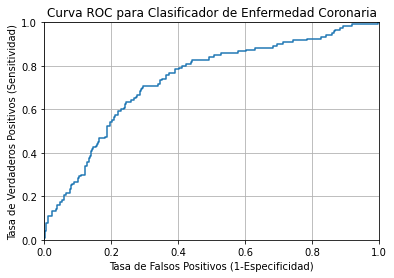

In [59]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para Clasificador de Enfermedad Coronaria')
plt.xlabel('Tasa de Falsos Positivos (1-Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensitividad)')
plt.grid(True)

Con base en los datos anteriores y a la gráfica, se puede indicar que un umbral entre 0.3 y 0.4, con tendencia a este último, permite un mejor desempeño del modelo ya que se logra la mayor sensitividad y la menor especificidad (basado en las matrices de confusión) a su vez que genera el mayor cociente de sensitividad entre especificidad (basado en la curva ROC)

Observe la gráfica, y teniendo en cuenta los resultados concluya sobre la proporción que se puede considerar más adecuada en este contexto.

## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico para un modelo de regresión logística. Realice el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista errores se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [9]:
np.random.seed(22)
tasas = [0.1,0.8,0.03,0.08]
for tasa in tasas:
    
    X_train_array = np.c_[np.ones(x_train.values.shape[0]), x_train.values]
    y_train_array = y_train.values
    w0 = np.random.rand(X_train_array.shape[1]) # Inicialización de w #
    w = w0.copy()
    # Inicialización de criterio de parada (al disminuir el valor de eps, se aumenta la precisión y el tiempo de procesamiento)
    eps = 1e-1
    error = 100
    dif = 100
    def sigma(w,x):
        res_sigmoid =1 / (1+ np.exp(np.dot(-w,x)))
        return res_sigmoid


    #Selección de par aleatorio
    i = np.random.randint(0,len(X_train_array[0])) # Posición aleatoria #
    xActual = X_train_array[i]
    yActual = y_train_array[i]
    w_trans = w.transpose()

    #while error>eps:         # Criterio de parada 1 #
    for j in range (0, 1000):  # Criterio de parada 2 #
        g= sigma(w_trans,xActual)
        e=yActual-g
        error= e
        w = w0 + (tasa*e*xActual)
        w0 = w.copy()
        i = np.random.randint(0,len(X_train_array[0])) # Posición aleatoria #
        xActual = X_train_array[i]
        yActual = y_train_array[i]
        w_trans = w.transpose()

    print('error de ' + str(error))
    X_test_array = np.c_[np.ones(x_test.values.shape[0]), x_test.values]
    y_test_array = y_test.values

    y_pred = np.zeros(len(x_test))

    for i in range(0,len(x_test)):
      prob = sigma(w,X_test_array[i])
      if prob>0.5:
        y_pred[i] = 1
      else:
        y_pred[i] = 0

    print(f'Precisión modelo actual: {sklearn.metrics.accuracy_score(y_test,y_pred)}')

error de 0.0
Precisión modelo actual: 0.7853333333333333
error de 0.0
Precisión modelo actual: 0.776
error de -3.2410993333326616e-282
Precisión modelo actual: 0.7946666666666666
error de 0.0
Precisión modelo actual: 0.8213333333333334


<ipython-input-9-60f1b5e8b009>:14: RuntimeWarning: overflow encountered in exp
  res_sigmoid =1 / (1+ np.exp(np.dot(-w,x)))


## Matriz de Confusión

Observe y analice la matriz de confusión para su mejor modelo. Escriba claramente sus conclusiones.

<AxesSubplot:>

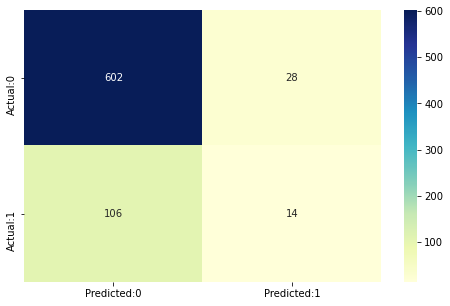

In [10]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")



## Conclusion

Basandonos en la matriz de confusión obtenida para el último modelo, cuya tasa de aprendizaje es del 0.08, se tienen bastantes aciertos positivos y esto indica que el modelo logra identificar en su mayoría correctamente los casos positivos, sin embargo, para los casos negativos ocurre lo contrario y es que hay más falsos negativos que verdaderos negativos lo cual indica que el modelo no es capaz de reconocer correctamente los casos negativos.